## 결측치 처리

+ isnull() : None 데이터인 경우는 True, 그렇지 않으면 False를 반환
+ dropna() : NaN 값을 소유한 행을 제거하고, axis = 1 옵션을 추가하면 열을 제거
+ fillna() : NaN 값을 소유한 데이터를 다른 값으로 치환하는 함수

### 결측치 제거

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic.isnull().sum(axis = 0) # NaN 값 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.dropna(thresh=800, axis = 1, inplace = True) # axis 기준으로 value 값이 thersh 이상 존재한다면 삭제 X, else 삭제
# 여기서는 null 값이 177개인 age와 deck이 제거됨

In [ ]:
titanic.dropna(axis = 0).reset_Index(inplace = True)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### 결측값 대치

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [ ]:
titanic.dropna(thresh = 800, axis = 1, inplace = True)

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [ ]:
titanic[titanic['embarked'].isnull()] # embarked, embark_town 결측값 대ㅊ[]

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,0,0,80.0,NaN,First,woman,False,NaN,yes,True


> 결측값 대치

+ 특정 단일값 채우기 : dataframe.fillna(0)
+ 결측치 바로 이전값으로 채우기 : dataframe.fillna(method = 'pad')
+ 결측치 바로 뒤의 값으로 채우기 : dataframe.fillna(method = 'bfill')
+ 보간법 사용 : dataframe.interpolate(method = 'linear')
+ 머신러닝 사용 : fancyimpute 패키지를 이용해서 KNN과 같은 알고리즘으로 결측값 대체



In [ ]:
titanic['embarked'].fillna(method = 'pad', inplace = True)
titanic['embark_town'].fillna(method = 'bfill' , inplace = True) ## backfill, forwardfill(ffill)도 사용가능

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
titanic['fare'].loc[np.arange(0,titanic.shape[0], 50)]  = np.NaN # 임의로 결측치 생성

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


> Sklearn.impute 패키지 사용

+ SimpleImputer : median, mean 등으로 결측값 대체 가능
+ KNNImputer : KNN을 사용하여 결측값 대체 가능

In [ ]:
# KNN imputer 패키지 사용
from sklearn.impute import SimpleImputer

# Parameter
# missing_values : 어떤 값을 대치할 것인지
# strategy : mean, median, most_frequent 등 어떻게 결측값을 채울지

imputer = SimpleImputer(strategy = 'median') # 결측치 method 설정 imputer 객체 선언
con = imputer.fit(pd.DataFrame(titanic['fare'])) # fitting (학습)
titanic_temp = pd.DataFrame(con.transform(pd.DataFrame(titanic['fare']))) # 결측치 채워넣기
titanic['fare'] = titanic_temp # 원래 데이터에 다시 삽입

In [ ]:
titanic['fare'].loc[np.arange(0,titanic.shape[0], 50)]  = np.NaN # 임의로 결측치 생성

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
from sklearn.impute import KNNImputer

KNNImputer = KNNImputer(n_neighbors = 3)

# 더미 변수 처리
# 범주형이 많은 데이터에서는 적합하지 않음
pd.DataFrame(KNNImputer.fit_transform(pd.get_dummies(titanic))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,3.0,1.0,0.0,16.583333,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,1.0,0.0,71.283300,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,3.0,0.0,0.0,7.925000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,1.0,0.0,53.100000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,0.0,0.0,8.050000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.0,13.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
887,1.0,1.0,0.0,0.0,30.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
888,0.0,3.0,1.0,2.0,23.450000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
889,1.0,1.0,0.0,0.0,30.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## 결측치 시각화

> seaborn 결측치 시각화

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

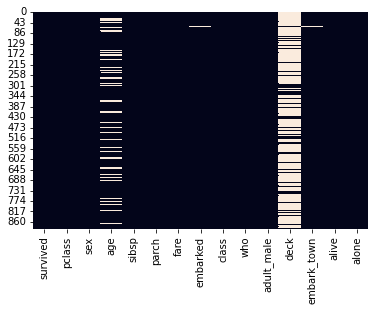

In [ ]:
sns.heatmap(titanic.isnull(), cbar = False)

> Missingno 결측치 시각화

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

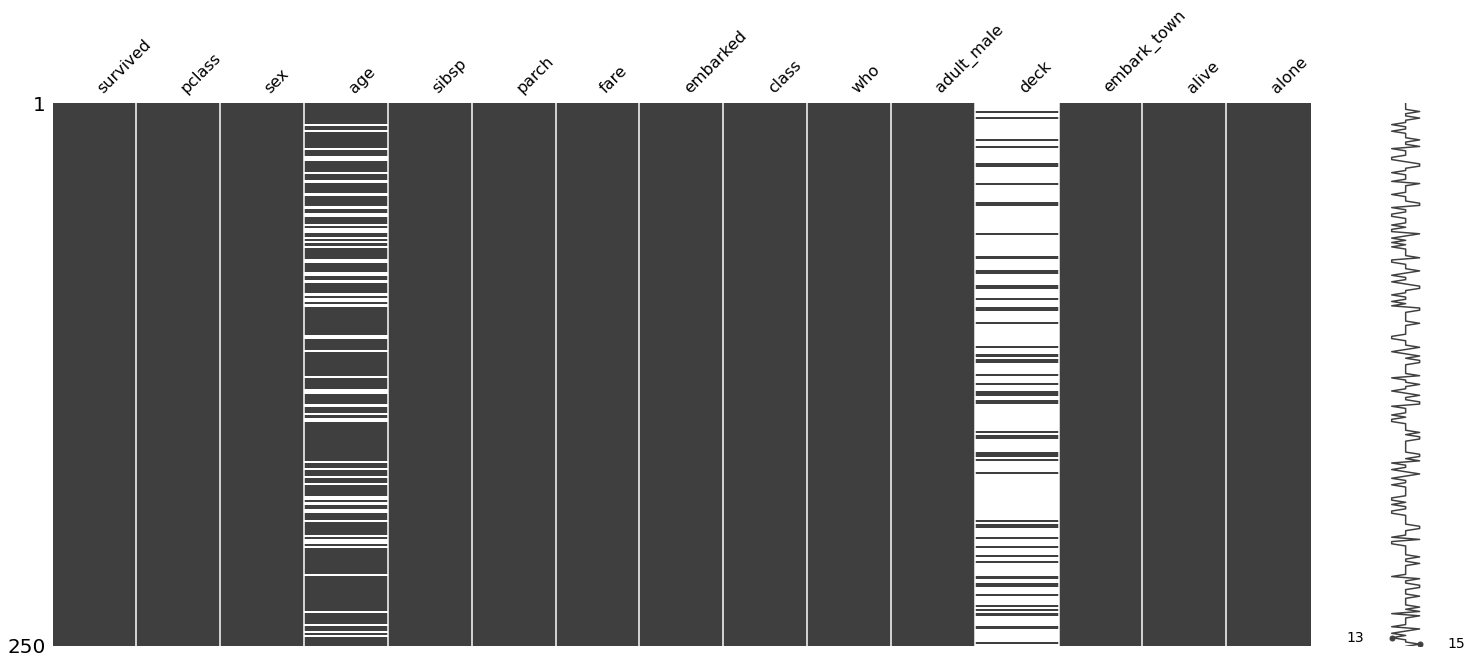

In [ ]:
msno.matrix(titanic.sample(250)) # 데이터프레임에서 무작위 표본 추출; parameter(n : 표본 개수, frac : 비율(둘 중 하나 사용))

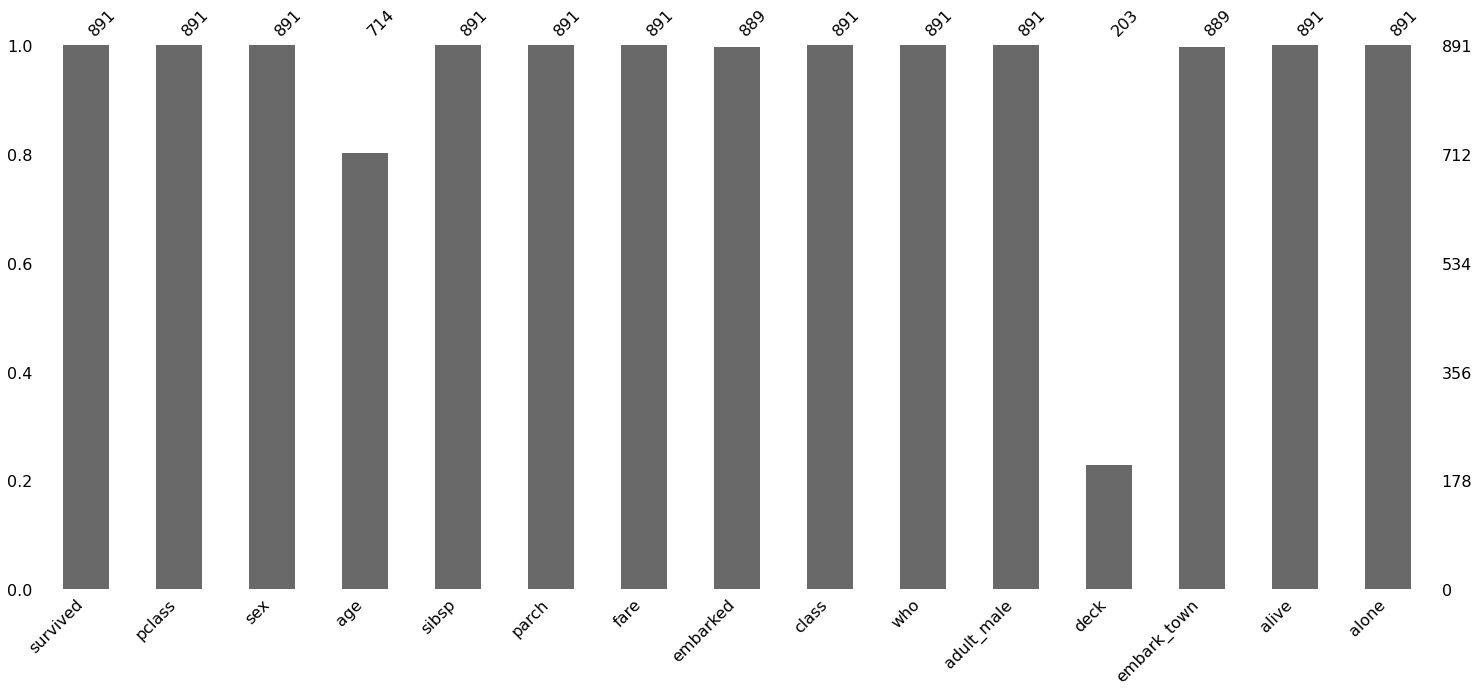

In [ ]:
msno.bar(titanic)

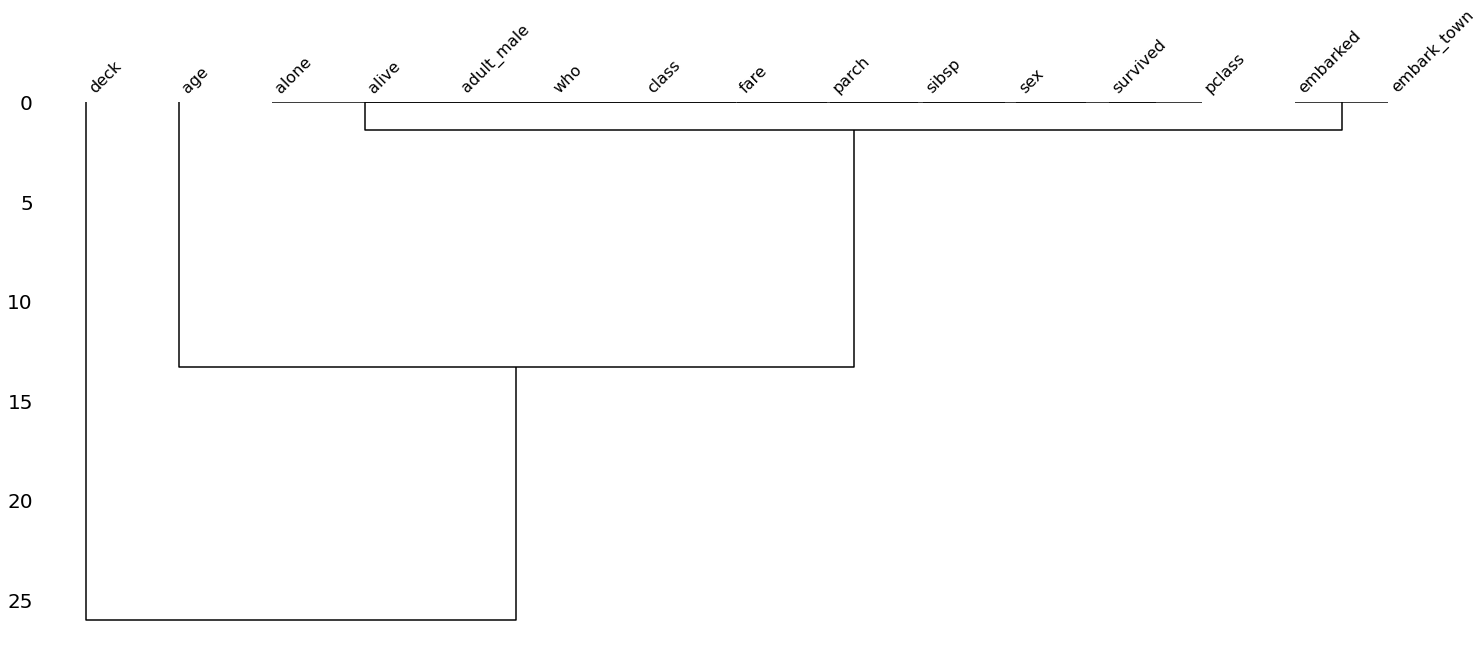

In [ ]:
msno.dendrogram(titanic) # Dendrogram